In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import requests
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
monthlyUnemployment=pd.read_csv('unemploymentOECD_monthly.csv')
monthlyUnemployment
usefulMonthlyUnemployment=monthlyUnemployment[['LOCATION','TIME','Value']]

In [3]:
url ='https://raw.githubusercontent.com/tm19784/tm19784.github.io/main/jsonFolder/rawPriceBTC.json'
html = requests.get(url)

In [4]:
Bitcoin_price_json = html.json()
BTC=pd.DataFrame(Bitcoin_price_json)
BTC_useful=BTC[['time_close','price_close']]
BTC_useful

,time_close,price_close
0,2015-04-29T16:21:00.0000000Z,146.12
1,2015-05-09T20:13:18.0000000Z,154.44
2,2015-05-19T22:52:30.5100000Z,149.86
3,2015-05-29T19:45:01.0000000Z,154.88
4,2015-06-08T22:20:07.0000000Z,149.16
...,...,...
238,2021-11-03T23:59:59.1590000Z,45971.73
239,2021-11-13T23:59:53.8400240Z,48097.75
240,2021-11-23T23:59:57.5870000Z,43078.60
241,2021-12-03T23:59:57.3880000Z,40643.28


In [5]:
BTC_useful['time_close'] = pd.to_datetime(BTC_useful['time_close'])
BTC_useful
BTC_monthly = BTC_useful.set_index('time_close').resample('1M').mean().reset_index()[-77:].reset_index()
BTC_monthly

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,time_close,price_close
0,4,2015-08-31 00:00:00+00:00,162.856667
1,5,2015-09-30 00:00:00+00:00,154.576667
2,6,2015-10-31 00:00:00+00:00,172.750000
3,7,2015-11-30 00:00:00+00:00,230.236667
4,8,2015-12-31 00:00:00+00:00,290.226667
...,...,...,...
72,76,2021-08-31 00:00:00+00:00,32926.090000
73,77,2021-09-30 00:00:00+00:00,33857.720000
74,78,2021-10-31 00:00:00+00:00,40583.986667
75,79,2021-11-30 00:00:00+00:00,45716.026667


In [6]:
usefulMonthlyUnemployment['TIME'] = pd.to_datetime(usefulMonthlyUnemployment['TIME'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
USA_usefulMonthlyUnemployment = usefulMonthlyUnemployment[usefulMonthlyUnemployment['LOCATION'].str.contains('USA')]
USA_usefulMonthlyUnemployment.reset_index()

,index,LOCATION,TIME,Value
0,1995,USA,2015-09-01,5.0
1,1996,USA,2015-10-01,5.0
2,1997,USA,2015-11-01,5.1
3,1998,USA,2015-12-01,5.0
4,1999,USA,2016-01-01,4.8
...,...,...,...,...
70,2065,USA,2021-07-01,5.4
71,2066,USA,2021-08-01,5.2
72,2067,USA,2021-09-01,4.8
73,2068,USA,2021-10-01,4.6


In [8]:
USA_BTC = USA_usefulMonthlyUnemployment.reset_index()[['LOCATION', 'TIME', 'Value']].join(BTC_monthly)
USA_BTC

,LOCATION,TIME,Value,index,time_close,price_close
0,USA,2015-09-01,5.0,4,2015-08-31 00:00:00+00:00,162.856667
1,USA,2015-10-01,5.0,5,2015-09-30 00:00:00+00:00,154.576667
2,USA,2015-11-01,5.1,6,2015-10-31 00:00:00+00:00,172.750000
3,USA,2015-12-01,5.0,7,2015-11-30 00:00:00+00:00,230.236667
4,USA,2016-01-01,4.8,8,2015-12-31 00:00:00+00:00,290.226667
...,...,...,...,...,...,...
70,USA,2021-07-01,5.4,74,2021-06-30 00:00:00+00:00,25347.843333
71,USA,2021-08-01,5.2,75,2021-07-31 00:00:00+00:00,24324.596667
72,USA,2021-09-01,4.8,76,2021-08-31 00:00:00+00:00,32926.090000
73,USA,2021-10-01,4.6,77,2021-09-30 00:00:00+00:00,33857.720000


In [9]:
USA_BTC.rename(columns={'Value': 'USA_unemployment_rate'}, inplace=True)
USA_BTC.rename(columns={'price_close': 'BTC_closing_price'}, inplace=True)

In [10]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set()

In [11]:
USA_BTC_correlation = USA_BTC[['USA_unemployment_rate','BTC_closing_price']]
USA_BTC.to_csv('USA_BTC.csv')
USA_Bitcoin_correlation = pd.read_csv('USA_BTC.csv')

[Text(0.5, 1.0, 'Regression of closing price of Bitcoin on unemployment rate of USA')]

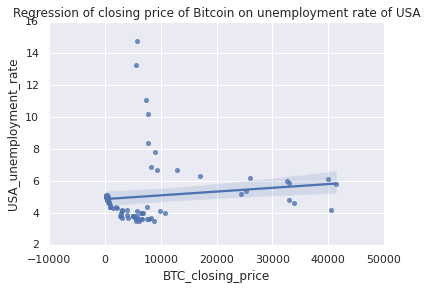

In [12]:
sns.regplot(x='BTC_closing_price',y='USA_unemployment_rate',data=USA_Bitcoin_correlation).set(title='Regression of closing price of Bitcoin on unemployment rate of USA')

In [13]:
from scipy.stats import linregress

In [14]:
slope, intercept, rvalue, pvalue, stderr = linregress(x=USA_Bitcoin_correlation.dropna()['BTC_closing_price'], y=USA_Bitcoin_correlation.dropna()['USA_unemployment_rate'])

In [15]:
regression_equation = print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
regression_R2 = print('R² = ',np.round(rvalue**2,2))

y =  0.0  * x +  4.87
R² =  0.01


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Text(0.5, 1.0, 'Relationship between Bitcoin price and USA unemployment')

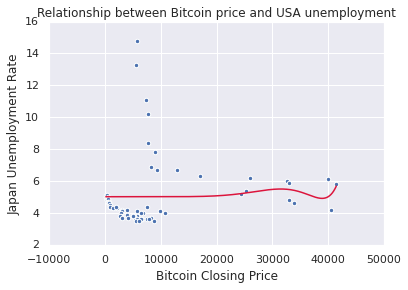

In [16]:
x = USA_Bitcoin_correlation.dropna()['BTC_closing_price']
y = USA_Bitcoin_correlation.dropna()['USA_unemployment_rate']

poly_model = make_pipeline(PolynomialFeatures(11),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.xlabel('Bitcoin Closing Price')
plt.ylabel('Japan Unemployment Rate')
plt.title('Relationship between Bitcoin price and USA unemployment')

In [17]:
df_fitz = pd.DataFrame(xfit,yfit)
df_fitz.rename({'index':'yfit'}, inplace=True)
df_fitz_2 = df_fitz.reset_index()
df_fitz_2.rename(columns={'index':'yfit'}, inplace=True)
df_fitz_2.rename(columns={0:'xfit'}, inplace=True)
df_fitz_2

,yfit,xfit
0,5.015631,154.576667
1,5.015631,195.909940
2,5.015631,237.243213
3,5.015631,278.576486
4,5.015631,319.909760
...,...,...
995,5.558743,41281.183574
996,5.587357,41322.516847
997,5.616819,41363.850120
998,5.647147,41405.183393


In [18]:
Regression_output_table = pd.concat([USA_Bitcoin_correlation, df_fitz_2])
Regression_output_table.head(85)

,Unnamed: 0,LOCATION,TIME,USA_unemployment_rate,index,time_close,BTC_closing_price,yfit,xfit
0,0.0,USA,2015-09-01,5.0,4.0,2015-08-31 00:00:00+00:00,162.856667,NaN,NaN
1,1.0,USA,2015-10-01,5.0,5.0,2015-09-30 00:00:00+00:00,154.576667,NaN,NaN
2,2.0,USA,2015-11-01,5.1,6.0,2015-10-31 00:00:00+00:00,172.750000,NaN,NaN
3,3.0,USA,2015-12-01,5.0,7.0,2015-11-30 00:00:00+00:00,230.236667,NaN,NaN
4,4.0,USA,2016-01-01,4.8,8.0,2015-12-31 00:00:00+00:00,290.226667,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.015631,361.243033
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.015631,402.576306
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.015631,443.909580
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.015631,485.242853


In [20]:
Regression_output_table.to_csv('Regression_output_USA_BTC.csv')